<a href="https://colab.research.google.com/github/Mr-Pacheco/Project---Analyzing-Airbnb-data/blob/main/Airbnb_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

## Análise dos Dados do Airbnb - Montreal, Canada - **PART 1**

* The [Airbnb](https://www.airbnb.com.br/) **began in 2008** when two designers who had space to share hosted three travelers looking for a place to stay. 


* Years after that, **millions of hosts and travelers** create a free Airbnb account so they can list their space and book unique accommodations **anywhere in the world**. And Airbnb experience hosts share their passions and interests with both travelers and locals.


* Airbnb is considered the **biggest hotel company in the world** and the company doesn't have any hotel. 


* Actually, **Airbnb is an online marketplace** that connects people who want to rent out their homes with people who are looking for accommodations in that locale. It currently covers **more than 100,000 cities and 220 countries worldwide**. The company’s name comes from “air mattress B&B.




In [ ]:
# import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Getting the data

All data used here was obtained from the  website [Airbnb](http://insideairbnb.com/get-the-data.html).

For this initial exploratory analysis, only the following file will be downloaded:

* `listings.csv` - * Summary information and metrics for listings in Montreal (good for visualizations). *

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/canada/qc/montreal/2020-12-18/visualisations/listings.csv')

## DataSet - overview

 * First, We will start by an overview. We will look at all the data to see if everything is ok and understand what is happing in this archive.

In [ ]:
# Starting to analyze the data
df = df.rename(columns={'neighbourhood': 'neighborhood'})
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2078,Central comfy close to Metro Laurie,2277,Nelia,NaN,Le Plateau-Mont-Royal,45.53069,-73.58588,Private room,38,2,245,2018-09-23,2.16,1,0
1,29059,Lovely studio Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51939,-73.56482,Entire home/apt,169,2,330,2020-10-27,2.58,2,350
2,29061,Maison historique - Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51929,-73.56493,Entire home/apt,248,3,69,2020-11-01,0.64,2,348
3,31847,Downtown/Airport room,2319,Gail,NaN,Le Sud-Ouest,45.48467,-73.57995,Private room,40,2,153,2020-01-07,1.19,5,0
4,34715,Chez Patrac ! Métro Beaubien,149769,Alain,NaN,Rosemont-La Petite-Patrie,45.53840,-73.60355,Entire home/apt,135,4,4,2011-09-12,0.03,1,358


## Q1. Variables and  entries of our data set. Mathematical overview

Let's go ahead and identify the number of entries that our dataset has and see the types of each column.

This * dataset * we downloaded is the "short" version of Airbnb. 



In [ ]:
# identificar o volume de dados do DataFrame
print("Entries:\t {}".format(df.shape[0]))
print("Variables:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entries:	 13767
Variables:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighborhood                       object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Dictionary of the variables**

* id - id number generated to identify the property
* name - name of the advertised property
* host_id - id number of the owner (host) of the property
* host_name - Host name
* neighborhood_group - this column does not contain any valid values
* neighborhood - neighborhood name
* latitude - coordinate of the property's latitude
* longitude - coordinate of the property's longitude
* Tipo_cala - informs the type of room that is offered
* price - price to rent the property
* minimum_nights - minimum number of nights to book
* number_of_reviews - number of reviews a property has
* last_review - data from the last revision
* reviews_per_month - number of comments per month
* calculado_host_listings_count - number of properties from the same host
* availability_365 - number of availability days within 365 days

## Q2. Analyzing the distribuiton of the variables

To identify the distribuiton of the variables, I will plot the histogram.

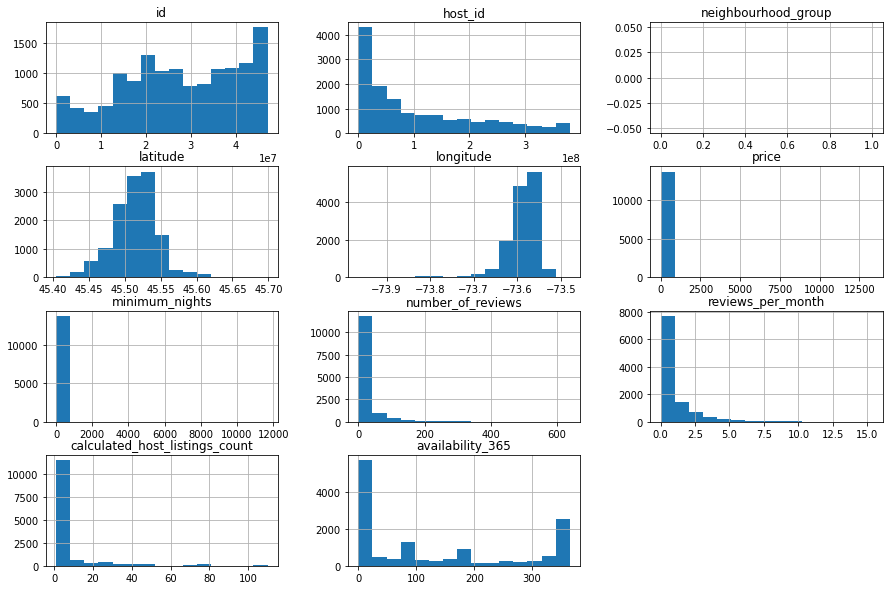

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

**df.describe()**
* This part is very important for the analysis, this method show us all the the data from a mathematical point of view.
* This method is very important I recommend look at it with calm.

In [ ]:
df.describe(include = 'all')

,id,name,host_id,host_name,neighbourhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,1.376700e+04,13759,1.376700e+04,13764,0.0,13767,13767.000000,13767.000000,13767,13767.000000,13767.000000,13767.000000,10525,10525.000000,13767.000000,13767.000000
unique,NaN,13373,NaN,4009,NaN,33,NaN,NaN,4,NaN,NaN,NaN,1453,NaN,NaN,NaN
top,NaN,Downtown Montreal Fully furnished apartment WIFI,NaN,Corporate Stays,NaN,Ville-Marie,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2020-09-07,NaN,NaN,NaN
freq,NaN,67,NaN,110,NaN,3866,NaN,NaN,9820,NaN,NaN,NaN,115,NaN,NaN,NaN
mean,2.762193e+07,NaN,1.044827e+08,NaN,NaN,NaN,45.515380,-73.588955,NaN,118.505339,14.112298,20.986562,NaN,0.891945,7.091668,130.273698
std,1.310793e+07,NaN,1.055869e+08,NaN,NaN,NaN,0.031601,0.042689,NaN,288.931405,107.392973,45.494290,NaN,1.247030,15.805663,142.181803
min,2.078000e+03,NaN,1.671000e+03,NaN,NaN,NaN,45.404050,-73.964510,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,1.821716e+07,NaN,1.704665e+07,NaN,NaN,NaN,45.496475,-73.602580,NaN,49.000000,1.000000,1.000000,NaN,0.130000,1.000000,0.000000
50%,2.758284e+07,NaN,6.483284e+07,NaN,NaN,NaN,45.517860,-73.579110,NaN,78.000000,2.000000,4.000000,NaN,0.380000,1.000000,85.000000
75%,3.957361e+07,NaN,1.705688e+08,NaN,NaN,NaN,45.533340,-73.565970,NaN,120.000000,8.500000,19.000000,NaN,1.120000,4.000000,269.000000


### **Observations**
* There is a column 'neighbourhood_group' have no information.
* In the column 'price' may have an error, the maximum value is too high and the minimum number is too low.
* In the column 'minimum_nights', the maximum number is too high.
* There are 33 neighbourhood and the top neighbourhood show up 3866 times, which is approximately 30%, the difference is huge, but it's normal. Probably we will work with the larger neighbourhoods, because it will improve our analysis.


In [ ]:
# Due to the column 'neighbourhood_group' doesn't have numbers, I will delete this column
# First change in the DataFrame, due to that I create a copy and changed the name
df1 = df.copy()
del df1['neighbourhood_group']
df1.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighborhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

#### **Analyzing the column 'minimum_nights'**

Number of outliers greater than 30 days(percentage) : 12.297523062395584
Number of outliers greater than 60 days(percentage) : 3.0289823490956636
Number of outliers greater than 90 days(percentage) : 1.757826687005157
Number of outliers greater than 180 days(percentage) : 0.6755284375680977
	
count    13767.000000
mean        14.112298
std        107.392973
min          1.000000
25%          1.000000
50%          2.000000
75%          8.500000
max      11684.000000
Name: minimum_nights, dtype: float64
	


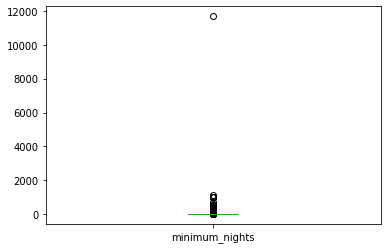

In [ ]:
outlier_nights30 = df1[df1['minimum_nights'] > 30]
outlier_nights60 = df1[df1['minimum_nights'] > 60]
outlier_nights90 = df1[df1['minimum_nights'] > 90]
outlier_nights180 = df1[df1['minimum_nights'] > 180]
df1['minimum_nights'].plot.box()
print('Number of outliers greater than 30 days(percentage) : {}'.format(outlier_nights30.shape[0]/df.shape[0]*100))
print('Number of outliers greater than 60 days(percentage) : {}'.format(outlier_nights60.shape[0]/df.shape[0]*100))
print('Number of outliers greater than 90 days(percentage) : {}'.format(outlier_nights90.shape[0]/df.shape[0]*100))
print('Number of outliers greater than 180 days(percentage) : {}'.format(outlier_nights180.shape[0]/df.shape[0]*100))
print('\t')
print(df['minimum_nights'].describe())
print('\t')

**Observations**
* Minimum_nights that are greater than 90 days represent just 1.75% of the data. 
* Due to that, we will work with the minimum_nights that are less than 90 days.Doing this, we will improve our analysis and minimize the standard deviation.


In [ ]:
# Changing the DataFrame againg
# Second change
df2 = df1.copy()
df2 = df2[df2['minimum_nights'] <= 90]
df2.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.352500e+04,1.352500e+04,13525.000000,13525.000000,13525.000000,13525.000000,13525.000000,10405.000000,13525.000000,13525.000000
mean,2.774033e+07,1.053353e+08,45.515508,-73.589009,117.227357,9.198817,21.181738,0.897807,7.094935,128.408355
std,1.303778e+07,1.058392e+08,0.031598,0.042779,262.709470,14.622987,45.697852,1.250887,15.846746,141.393816
min,2.078000e+03,1.671000e+03,45.404050,-73.964510,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.830737e+07,1.728986e+07,45.496590,-73.602610,49.000000,1.000000,1.000000,0.130000,1.000000,0.000000
50%,2.768176e+07,6.605581e+07,45.518040,-73.579110,78.000000,2.000000,4.000000,0.380000,1.000000,83.000000
75%,3.963519e+07,1.729237e+08,45.533390,-73.565980,120.000000,7.000000,19.000000,1.130000,4.000000,264.000000
max,4.711247e+07,3.805796e+08,45.698850,-73.479630,13000.000000,90.000000,638.000000,15.330000,110.000000,365.000000


####**Analazying the column 'price'**

Standard deviation : 262.7094704966895 (All the price greater than the mean(78) + std are outliers)
	
Percentage of outliers greater than $200 : 8.556693542529237
Percentage of outliers greater than $500 : 1.8232004067698118
Percentage of outliers greater than $750 : 1.1476719692017143
Percentage of outliers greater than $1000 : 0.7045834241301664
	
count    13525.000000
mean       117.227357
std        262.709470
min          0.000000
25%         49.000000
50%         78.000000
75%        120.000000
max      13000.000000
Name: price, dtype: float64
	


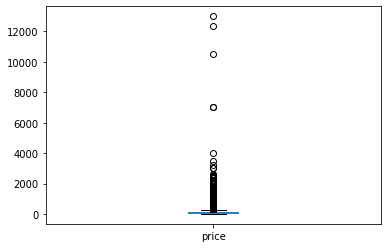

In [ ]:
# Looking for outliers
outlier_price1 = df2[df2['price'] > 200]
outlier_price2 = df2[df2['price'] > 500]
outlier_price3= df2[df2['price'] > 750]
outlier_price4 = df2[df2['price'] > 1000]

# Standard deviation
print('Standard deviation : {} (All the price greater than the mean(78) + std are outliers)'.format(df2['price'].std()))
print('\t')
df2['price'].plot.box()

# Percentage of the outliers in the DataFrame
print('Percentage of outliers greater than $200 : {}'.format(outlier_price1.shape[0]/df1.shape[0]*100))
print('Percentage of outliers greater than $500 : {}'.format(outlier_price2.shape[0]/df1.shape[0]*100))
print('Percentage of outliers greater than $750 : {}'.format(outlier_price3.shape[0]/df1.shape[0]*100))
print('Percentage of outliers greater than $1000 : {}'.format(outlier_price4.shape[0]/df1.shape[0]*100))
print('\t')
print(df2['price'].describe())
print('\t')

**Observations**
* The percetange of price that are greater than $500 is 1.82% of the data df2 and all of that are outliers.
* We will work without these outliers to improve our analysis.

In [ ]:
# Change number 3
df3 = df2.copy()
df3 = df3[df3['price'] <= 500]
df3.reset_index
df3.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.327400e+04,1.327400e+04,13274.000000,13274.000000,13274.000000,13274.000000,13274.000000,10248.000000,13274.000000,13274.000000
mean,2.776280e+07,1.053006e+08,45.515644,-73.588990,95.153835,9.232937,21.226006,0.898331,7.091080,127.064110
std,1.303660e+07,1.057855e+08,0.031660,0.042427,72.940665,14.577274,45.933957,1.255688,15.918743,140.832502
min,2.078000e+03,1.671000e+03,45.404050,-73.964510,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.837391e+07,1.719874e+07,45.496590,-73.602910,48.000000,1.000000,1.000000,0.130000,1.000000,0.000000
50%,2.770227e+07,6.608552e+07,45.518200,-73.579195,76.000000,2.000000,4.000000,0.380000,1.000000,80.000000
75%,3.965703e+07,1.721007e+08,45.533590,-73.566020,117.000000,7.000000,19.000000,1.130000,4.000000,261.000000
max,4.711247e+07,3.805796e+08,45.698850,-73.479630,500.000000,90.000000,638.000000,15.330000,110.000000,365.000000


## Q3. Percentage of missing values in the dataset

In [ ]:
(df3.isnull().sum() / df.shape[0]).sort_values(ascending = False)

reviews_per_month                 0.219801
last_review                       0.219801
name                              0.000581
host_name                         0.000218
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighborhood                      0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

The quality of a dataset is directly related to the amount of missing values. It is important to understand early on whether these null values are significant compared to the total entries.

* The `reviews_per_month` and` last_review` variables have null values in almost half of the lines.
* The `name` and` host_name` variables have approximately 0.1% of the null values. 

### **Dealing with missing values**

In [ ]:
nulos1 = df3[df3['reviews_per_month'].isnull()]
nulos2 = df3[df3['last_review'].isnull()]
print(nulos1.shape)
print('\t')
print(nulos2.shape)
print('\t')
nulos1.head()

(3026, 15)
	
(3026, 15)
	


,id,name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
13,67514,Double Bed in Room with Skylight,333083,Dan,Montréal-Ouest,45.45372,-73.65060,Private room,150,3,0,NaN,NaN,1,0
43,182142,6 1/2- COSY - GARDEN & ELECTRIC CAR,818883,Lapelemo,Côte-des-Neiges-Notre-Dame-de-Grâce,45.49329,-73.62615,Entire home/apt,230,31,0,NaN,NaN,3,364
46,190961,De l'Eglise metro station,923876,Farhad,Verdun,45.45920,-73.56547,Private room,38,1,0,NaN,NaN,1,365
49,200322,Big double room,163569,M.,Ville-Marie,45.52732,-73.55633,Private room,102,10,0,NaN,NaN,2,365
100,411826,Two story condo in the Plateau,2049921,Vlad,Le Plateau-Mont-Royal,45.53484,-73.58410,Entire home/apt,140,2,0,NaN,NaN,1,0


#### **Observations**
* Both the columns, 'last_review' and 'reviews_per_month', have missing values due to the column 'number_of_reviews'.
* If the the column 'number_of_reviews' == 0, so it means that no one send any reviews, then the columns, 'last_review' and 'reviews_per_month', will be = NaN.

In [ ]:
# Due to the observations, I will replace the NaN values with zero.
# Both columns will be replaced

# the column 'reviews_per_month' is a float
df3['reviews_per_month'].fillna('0', inplace = True)
df3 = df3.astype({'reviews_per_month': float})
# the column 'last_review' is a date
df3['last_review'].fillna('No review yet', inplace = True)

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13274 entries, 0 to 13766
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13274 non-null  int64  
 1   name                            13266 non-null  object 
 2   host_id                         13274 non-null  int64  
 3   host_name                       13271 non-null  object 
 4   neighborhood                    13274 non-null  object 
 5   latitude                        13274 non-null  float64
 6   longitude                       13274 non-null  float64
 7   room_type                       13274 non-null  object 
 8   price                           13274 non-null  int64  
 9   minimum_nights                  13274 non-null  int64  
 10  number_of_reviews               13274 non-null  int64  
 11  last_review                     13274 non-null  object 
 12  reviews_per_month               

In [ ]:
print(df3['reviews_per_month'].value_counts())
print(df3['last_review'].value_counts())

0.00    3026
0.07     279
0.06     277
0.02     275
0.03     241
        ... 
3.37       1
5.61       1
6.61       1
4.40       1
3.97       1
Name: reviews_per_month, Length: 622, dtype: int64
No review yet    3026
2020-09-07        109
2020-11-29        101
2020-11-30         94
2020-02-17         82
                 ... 
2015-03-18          1
2018-02-07          1
2020-07-14          1
2017-03-31          1
2019-04-26          1
Name: last_review, Length: 1429, dtype: int64


## Q4. The importance of each neighbordhood

### Analyzing the column 'neighborhood'
* According the df.describe(), I noticed that there is a disproportion and this can hinder the analysis
* This can occur due to many reasons and it reflect where the people want to move to and the size of the neighborhood in matter of structure,development and people.
* This not means that the top 1 neighborhood is the best, but it means that it's a important and a big neighborhood.

In [ ]:
print(df3['neighborhood'].describe())
print('\t')
print(df3['neighborhood'].value_counts(dropna = False))

count           13274
unique             33
top       Ville-Marie
freq             3682
Name: neighborhood, dtype: object
	
Ville-Marie                                 3682
Le Plateau-Mont-Royal                       3411
Rosemont-La Petite-Patrie                   1261
Côte-des-Neiges-Notre-Dame-de-Grâce          997
Le Sud-Ouest                                 875
Mercier-Hochelaga-Maisonneuve                691
Villeray-Saint-Michel-Parc-Extension         677
Verdun                                       311
Ahuntsic-Cartierville                        254
Outremont                                    151
Saint-Laurent                                150
LaSalle                                      116
Westmount                                     85
Lachine                                       78
Montréal-Nord                                 62
Saint-Léonard                                 61
Rivière-des-Prairies-Pointe-aux-Trembles      61
Anjou                                      

In [ ]:
top_10_nbh = df3['neighborhood'].value_counts().head(10)
top_5_nbh = df3['neighborhood'].value_counts().head(5)
print('Percentage top 10 neighborhood : {}'.format((top_10_nbh / df3.shape[0]).sum()))
print('Percentage top 5 neighborhood : {}'.format((top_5_nbh / df3.shape[0]).sum()))
print('\t')
print(top_10_nbh)

Percentage top 10 neighborhood : 0.9273768268796143
Percentage top 5 neighborhood : 0.7703781829139672
	
Ville-Marie                             3682
Le Plateau-Mont-Royal                   3411
Rosemont-La Petite-Patrie               1261
Côte-des-Neiges-Notre-Dame-de-Grâce      997
Le Sud-Ouest                             875
Mercier-Hochelaga-Maisonneuve            691
Villeray-Saint-Michel-Parc-Extension     677
Verdun                                   311
Ahuntsic-Cartierville                    254
Outremont                                151
Name: neighborhood, dtype: int64


#### **Observations**
* After this analysis, I will work with the top 5 and top 10.
* The disproportion of the neighborhoods is too big and it hinder the analysis.
* There 33 neighborhood and the top 10 represents almost 93% of all the data set and the top 5 represents 77% of all the data set.

In [ ]:
# I will create two new DataFrames
# The first will be with the top 10 neighborhood
top5 = ['Ville-Marie', 'Le Plateau-Mont-Royal', 'Le Sud-Ouest','Rosemont-La Petite-Patrie', 'Côte-des-Neiges-Notre-Dame-de-Grâce']
# The second will be with the top 5 neighborhood
top10 = ['Ville-Marie', 'Le Plateau-Mont-Royal', 'Rosemont-La Petite-Patrie', 'Outremont',
'Côte-des-Neiges-Notre-Dame-de-Grâce', 'Le Sud-Ouest', 'Mercier-Hochelaga-Maisonneuve',
'Villeray-Saint-Michel-Parc-Extension', 'Verdun', 'Ahuntsic-Cartierville']     

df_top5 = df3[df3['neighborhood'].isin(top5)]
display(df_top5['neighborhood'].value_counts())
print('\t')
df_top10 = df3[df3['neighborhood'].isin(top10)]
display(df_top10['neighborhood'].value_counts())

Ville-Marie                            3682
Le Plateau-Mont-Royal                  3411
Rosemont-La Petite-Patrie              1261
Côte-des-Neiges-Notre-Dame-de-Grâce     997
Le Sud-Ouest                            875
Name: neighborhood, dtype: int64

Ville-Marie                             3682
Le Plateau-Mont-Royal                   3411
Rosemont-La Petite-Patrie               1261
Côte-des-Neiges-Notre-Dame-de-Grâce      997
Le Sud-Ouest                             875
Mercier-Hochelaga-Maisonneuve            691
Villeray-Saint-Michel-Parc-Extension     677
Verdun                                   311
Ahuntsic-Cartierville                    254
Outremont                                151
Name: neighborhood, dtype: int64

#### Checking
* Checking if everything is ok with both dataframes
* I separated in two dataframes two see if there are some differences in the analysis

In [ ]:
df_top10.describe(include = 'all')

,id,name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,1.231000e+04,12304,1.231000e+04,12307,12310,12310.000000,12310.000000,12310,12310.000000,12310.000000,12310.000000,12310,12310.000000,12310.000000,12310.000000
unique,NaN,11965,NaN,3585,10,NaN,NaN,4,NaN,NaN,NaN,1408,NaN,NaN,NaN
top,NaN,Downtown Montreal Fully furnished apartment WIFI,NaN,Corporate Stays,Ville-Marie,NaN,NaN,Entire home/apt,NaN,NaN,NaN,No review yet,NaN,NaN,NaN
freq,NaN,67,NaN,110,3682,NaN,NaN,8757,NaN,NaN,NaN,2784,NaN,NaN,NaN
mean,2.767508e+07,NaN,1.035349e+08,NaN,NaN,45.516396,-73.582686,NaN,95.063607,9.319009,21.429569,NaN,0.695405,7.439805,125.392526
std,1.310589e+07,NaN,1.057820e+08,NaN,NaN,0.026646,0.026499,NaN,72.630136,14.731613,46.509223,NaN,1.174049,16.432663,140.540433
min,2.078000e+03,NaN,1.671000e+03,NaN,NaN,45.436840,-73.729610,NaN,0.000000,1.000000,0.000000,NaN,0.000000,1.000000,0.000000
25%,1.823972e+07,NaN,1.615839e+07,NaN,NaN,45.497583,-73.596865,NaN,48.000000,1.000000,1.000000,NaN,0.030000,1.000000,0.000000
50%,2.755957e+07,NaN,6.396418e+07,NaN,NaN,45.518915,-73.577980,NaN,77.000000,2.000000,4.000000,NaN,0.210000,1.000000,77.000000
75%,3.967580e+07,NaN,1.672682e+08,NaN,NaN,45.533620,-73.565190,NaN,118.000000,7.000000,19.000000,NaN,0.830000,4.000000,257.000000


In [ ]:
df_top5.describe(include = 'all')

,id,name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,1.022600e+04,10221,1.022600e+04,10224,10226,10226.000000,10226.000000,10226,10226.000000,10226.000000,10226.000000,10226,10226.000000,10226.000000,10226.000000
unique,NaN,9930,NaN,3069,5,NaN,NaN,4,NaN,NaN,NaN,1324,NaN,NaN,NaN
top,NaN,Downtown Montreal Fully furnished apartment WIFI,NaN,Corporate Stays,Ville-Marie,NaN,NaN,Entire home/apt,NaN,NaN,NaN,No review yet,NaN,NaN,NaN
freq,NaN,67,NaN,110,3682,NaN,NaN,7351,NaN,NaN,NaN,2332,NaN,NaN,NaN
mean,2.782681e+07,NaN,1.056470e+08,NaN,NaN,45.512399,-73.581198,NaN,97.939664,9.412478,22.510561,NaN,0.726783,8.425288,126.923235
std,1.326805e+07,NaN,1.079887e+08,NaN,NaN,0.021964,0.020443,NaN,74.067740,14.889895,48.859687,NaN,1.218869,17.664711,140.658756
min,2.078000e+03,NaN,1.671000e+03,NaN,NaN,45.438860,-73.661090,NaN,0.000000,1.000000,0.000000,NaN,0.000000,1.000000,0.000000
25%,1.818251e+07,NaN,1.618776e+07,NaN,NaN,45.496800,-73.590455,NaN,50.000000,1.000000,1.000000,NaN,0.030000,1.000000,0.000000
50%,2.780031e+07,NaN,6.447804e+07,NaN,NaN,45.515835,-73.577750,NaN,80.000000,2.000000,4.000000,NaN,0.210000,1.000000,79.000000
75%,4.002421e+07,NaN,1.756797e+08,NaN,NaN,45.528047,-73.566650,NaN,120.000000,7.000000,19.000000,NaN,0.870000,6.000000,259.000000


## Finish part 1
* This is the first part of the project.
* The next part will be a deeper analysis.

In [157]:
df_top10.to_csv(r'Airbnb_top10.csv', index = False)

In [ ]:
df_top5.to_csv(r'Airbnb_top5.csv', index = False)